# Use CDF to Calculate Probabilities (Practice)

We will use the human height data set:

Use the normal cumulative distribution function with the mean and standard deviation of female height to calculate the probability that a female's height is:

1. between 55.0 and 56.0 inches

2. is less than 5 feet (60 in)

3. is greater than the mean (hint: do you know this answer intuitively?)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRxp-hsw61ck9cpt5ExZIUhvSGT5zYzoUJl_7xr7YF5qZeazC8393q2taqwkDvMxVirgFDJm1WX3uAC/pub?output=csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
males = df.loc[ df['Gender'] == 'Male'].copy()
females = df.loc[ df['Gender'] == 'Female'].copy()

In [7]:
data = females['Height']

In [8]:
low_end = 55.0
high_end = 56.0

In [9]:
mean = np.mean(data)
std = np.std(data)
min = np.min(data)
max = np.max(data)
x_range = np.linspace(min, max,1000)

In [10]:
pdf = stats.norm.pdf(x_range, loc=mean, scale=std)

In [11]:
cdf = stats.norm.cdf(x_range, loc=mean, scale=std)

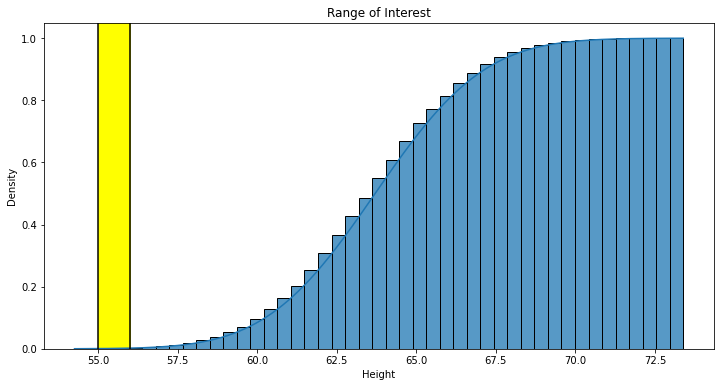

In [12]:
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(x=data, stat='density', cumulative = True)
ax.plot(x_range,cdf)
ax.axvline(low_end, color= 'black')
ax.axvline(high_end, color ='black')
ax.axvspan(low_end, high_end, color ='yellow', zorder = 0)
ax.set_title('Range of Interest');

In [13]:
stats.norm.cdf(high_end, loc=mean, scale=std) - stats.norm.cdf(low_end, loc=mean, scale=std)

0.0015043054289559745

In [14]:
stats.norm.cdf(60, loc=mean, scale=std)

0.0844649272520746

In [15]:
1 -stats.norm.cdf(mean, loc=mean,scale=std)

0.5

- The probability that a female's height is greater than the mean is 50%